## Homework 03

**David Clapp**

**DSCI 39001 - Neural Networks**

**Due Monday, Feb. 04, 9 AM**

## Description 

In this assignment, you will be tasked with designing a neural network to be trained on the "Breast Cancer" dataset. Information about the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## Import Packages.

Import the `numpy` and `matplotlib` packages. You should also import the standard classes we have used for building neural network models in keras. I recommend using the `Adam` optimizer. Finally, you should import the `set_random_seed` function from `tensorflow`, and the `train_test_split` function from `sklearn`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow import set_random_seed
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Loading and Preparing the Data

The cell below will import the data from `sklearn`, and will extract the feature and label arrays. Add some code to print the shapes of these two arrays.

In [2]:
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()
X = bc_data.data
y = bc_data.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


As we can see, the data set contains 569 samples, each of which has 30 features. Each sample represents a single tumor, and the features represent measurements taken of the tumor. 

The cell below prints the names of the 30 features, and the names of the classes that the labels correspond to. Note that labels will be encoded as 0 or 1 within the label array.

In [3]:
print('The names of the features are:')
print(bc_data.feature_names)

print('\nThe names of the classes are:', bc_data.target_names)

The names of the features are:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

The names of the classes are: ['malignant' 'benign']


Our goal is to design and train a network that will use the 30 features as inputs, and will output a single value which will be intepreted as an estimate of the probability that the tumor is benign (Class 1). 

In the next cell, split `X` and `y` as follows:
* Split `X` into `X_train`, `X_val`, and `X_test`. 
* Split `y` into `y_train`, `y_val`, and `y_test`. 

Split the data so that the validation and testing sets each contain 20% of the data. For the sake of reproducibility, set `random_state=1` in each call of `train_test_split`. There are a few ways to do this, but to help ensure that we all get the same results, I have provided some of the code for you.

In [4]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.4, random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size = 0.5, random_state = 1)

## Build and Train the Model

Perform the following steps in the cell below:
1. Use `np.random.seed` and `set_random_seed` to set the Python and Tensorflow seeds to 1. 
2. Create a sequential model. You should experiment with the number of hidden layers and nodes. I recommend using the Relu activation for the hidden layers. The output layer must use a sigmoid activation. 
3. Create an optimizer object, and set the learning rate to a value of your choice. 
4. Compile your model. Specify the loss and optimizer as appropriate. Set the `metrics` parameter so that accuracy is displayed during training. 
5. Fit the model on the training data. Make sure that progress on the validation data is displayed during training. Set `verbose=2`. You can experiment with the batch_size and epochs, but please keep the number of epochs less than 200 for this problem. 

Your goal is to find a model that will obtain a validation accuracy of at least 93%.

In [5]:
np.random.seed(1)
set_random_seed(1)

model = Sequential()
model.add(Dense(15, input_shape = (30,), activation = 'relu'))
model.add(Dense(10, input_shape = (30,), activation = 'relu'))
model.add(Dense(5, input_shape = (30,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr = 0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

h = model.fit(X, y, batch_size=350, epochs=200, verbose=0, validation_data=(X_val,y_val))
print(h.history['acc'][-1])

0.9472759123007736


## Visualizing Training Process

Display two side-by-side plots that show how the loss and accuracy change during training. For each plot, label both axes, add a title, and display the legend. 

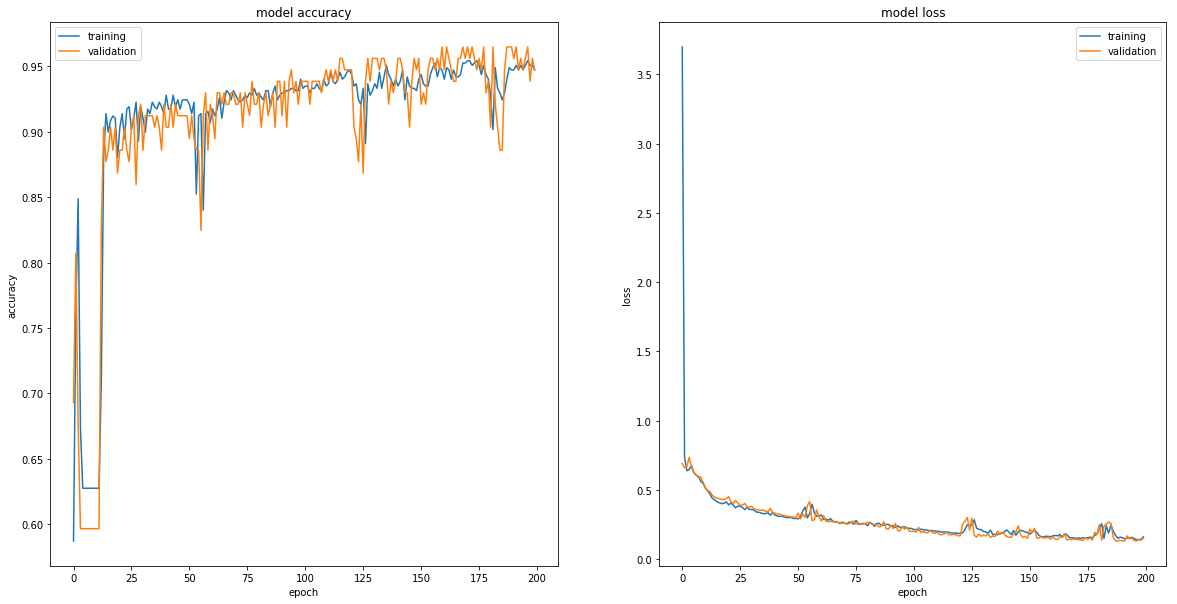

In [6]:
plt.rcParams["figure.figsize"] = [20,10]
plt.subplot(1,2,1)
plt.plot(h.history['acc'], label = 'training')
plt.plot(h.history['val_acc'], label = 'validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(h.history['loss'], label = 'training')
plt.plot(h.history['val_loss'], label = 'validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Analyze Performance on the Test Set

In the cell below, use the `evaluate` method of your model to calculate the loss and accuracy obtained by the model on the test set. Print out two lines that read as follows:

    Testing Loss:     #####
    Testing Accuracy: #####

In [7]:
test_res = model.evaluate(X_test, y_test, verbose=0)

print('Testing Loss:    ', test_res[0])
print('Testing Accurasy:', test_res[1])

Testing Loss:     0.12708063868054173
Testing Accurasy: 0.9736842063435337


Create an array called `y_pred` that contains the predicted labels for samples in the test set. 

In [8]:
y_pred = model.predict_classes(X_test)

Run the two cells below to display a confusion matrix and a classification report for the test set. We will explain the purpose of these reports later. 

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[34  0]
 [ 3 77]]


In [10]:
print(classification_report(y_test, y_pred, target_names=bc_data.target_names))

              precision    recall  f1-score   support

   malignant       0.92      1.00      0.96        34
      benign       1.00      0.96      0.98        80

   micro avg       0.97      0.97      0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

